In [28]:
# On commence par importer les bibliothèques qui vont nous servir.
import numpy as np
import scipy.io as sp
import matplotlib.pyplot as plt

In [24]:
# on charge notre dataset (les features X ainsi que les labels y : y vrai)
# nous n'utiliserons pas les y pour le non supervisé mais simplement pour remédier au déséquilibre de classe)

dataSet = sp.loadmat('breastw.mat') 
print(type(dataSet))

<class 'dict'>


La classe dictionnaire suit le modèle suivant :
                    'key' : 'value' ~= mot : définition
Il faut maintenant identifier les features et les labels.

In [16]:
# On extrait les données du champ 'X' du dictionnaire
X = dataSet['X'] 
# on regarde la taille de la matrice
np.shape(X) 
# on affiche les données
print(X)

[[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]


On a donc 683 observations avec 9 features (caractéristiques). Les caractéristques varient entre 1 et 10.

In [15]:
# on extrait les données du champ 'y'
label = dataSet['y'] 
# on regarde la taille du vecteur
np.shape(label)
# on affiche les données
print(label)

[[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]


On retrouve bien nos 683 observations affectées soit à la claase 0 : bénine soit la classe 1 : maline. 

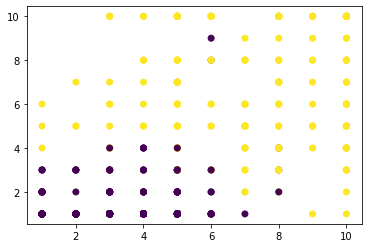

In [36]:
plt.scatter(X[:,0], X[: , 1], c=label , alpha=1)

In [19]:
# argwhere(condition) renvoie les indices (sous forme d'une liste) pour lesquels la condition est vérifiée
malignIdx = np.argwhere(label == 1)
benignIdx = np.argwhere(label == 0)
#  On dénombre le nombre d'observations bénines et malines. 
# la fonction len() renvoie la longueur d'un vecteur
print("Maline :",len(malignIdx)) 
print("Bénine :",len(benignIdx))

Maline : 239
Bénine : 444


On remarque donc que les deux classes ne sont pas équilibrées. Si on applique des algortihmes au dataset, les réuslats obtenues ne,seront pas optimaux à cause du déséquilibre des classes. Pour y remédier on pourra Par exemple avec la méthode cross-validation. 

Cela permet de surmonter le problème de maximisation des sets d'entrainement et de test, puisque l'ensemble du data set va servir à la fois au test et au train, itérativement. Le nombre d'itération effectué dépend directement du nombre de partition du dataset (sachant qu'une observatio  ne peut appartenir qu'à 1 seule partition).


On commende par définir notre premier modèle : le modèle de clustering suivant : KMeans 

14733.726337582568

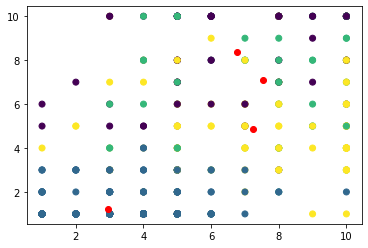

In [51]:
from sklearn.cluster import KMeans
# on définit notre Kmeans avec n_clusters, le nombre de cluster et de centroïdes associés à former, 
# n_init le nombre d'éxécution de l'algorithme pour trouver l'initialisation la plus optimale
# max_iter le nombre d'itération de l'algorithme pour 1 éxécution
# init : la méthode d'initialisation employée pour placer les centroïdes des clusters
# De base il s'agit de Kmeans ++ qui place les controïdes sur des points du dataset éloignés les uns des autres -> pour favoriser la convergence
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
model = KMeans(n_clusters = 4, init ='k-means++', n_init = 10, max_iter = 300)
# La méthode .fit() exécute le modèle sur les features
model.fit(X) 
# La méthode .predict() permet de prédire pour chaque échantillon/observation son cluster d'appartenance et donc le centroïde associé
model.predict(X)
plt.scatter(X[:,0], X[: , 1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='r')
model.inertia_

Pour optimiser l'algortihme, il faut trouver les bons hyperparamètres (paramètres qu'il faut fournir au modèle). le paramètre principal de Kmeans est le nombre de cluster K. Il existe une méthode qui permet de déterminer le nombre adéquat de cluster associé au dataset. il s'agit de la méthode du coude qui consiste à tracer l'évolution du coût du modèle (l'inertie ou fonction coût) en fonction du nombre de cluster.  La détection d'une zone de "coude" correspond à la minimisation de la focntion coût et donc au choix de K le plus approprié.

In [53]:
# Création d'une liste pour contenir les coûts du modèle pour différent k
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters =k).fit(X)
    inertia.append(model.inertia_)

Text(0, 0.5, 'Coût du modèle')

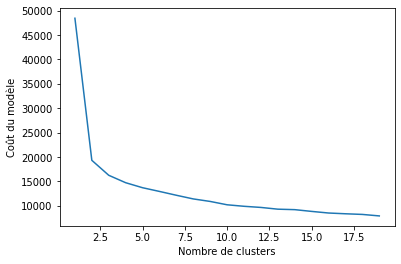

In [54]:
plt.plot(K_range, inertia)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût du modèle')